In [58]:
def search_pairsd(array, k):
    result = {}
    for i, a in enumerate(array):
        for j,b in enumerate(array):
            if i != j and a + b == k:
                if b < a:
                    a,b = b,a 
                if (a,b) not in result:
                    result[(a,b)] = True
                    break
    return list(result.keys())

def search_pairsl(array, k):
    result = []
    for i, a in enumerate(array):
        for j,b in enumerate(array):
            if i != j and a + b == k:
                if b < a:
                    a,b = b,a 
                if (a,b) not in result:
                    result.append((a,b))
                break
    return result

@njit
def search_pairsNumba1(array, k):
    result = []
    for i, a in enumerate(array):
        for j,b in enumerate(array):
            if i != j and a + b == k:
                if b < a:
                    a,b = b,a 
                if (a,b) not in result:
                    result.append((a,b))
                break
    return result

@njit
def search_pairsNumba2(array, k):
    result = {}
    for i, a in enumerate(array):
        for j,b in enumerate(array):
            if i != j and a + b == k:
                if b < a:
                    a,b = b,a 
                if (a,b) not in result:
                    result[(a,b)] = True
                    break
    return list(result.keys())

In [59]:
import numpy as np
from numba import njit
from matplotlib import pyplot as plt

In [88]:
test = []
for n in range(1,5):
    array = np.random.randint(8, size=10**n)
    dL = %timeit -o search_pairsl(array,5)
    dD = %timeit -o search_pairsd(array,5)
    dNL = %timeit -o search_pairsNumba1(array,5)
    dND = %timeit -o search_pairsNumba2(array,5)
    test.append([dL.average,dD.average,dNL.average,dND.average])
test = np.asarray(test)

29.9 µs ± 728 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
43.5 µs ± 118 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
996 ns ± 55.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.64 µs ± 54.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
1.57 ms ± 14.2 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.79 ms ± 28.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.72 µs ± 122 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
27.3 µs ± 27.9 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)
103 ms ± 3.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
541 ms ± 51.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
222 µs ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
4.13 ms ± 148 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.3 s ± 1.94 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
42 s ± 1.79 s per loop (mean ± std. dev. of 7 runs, 1 loop each

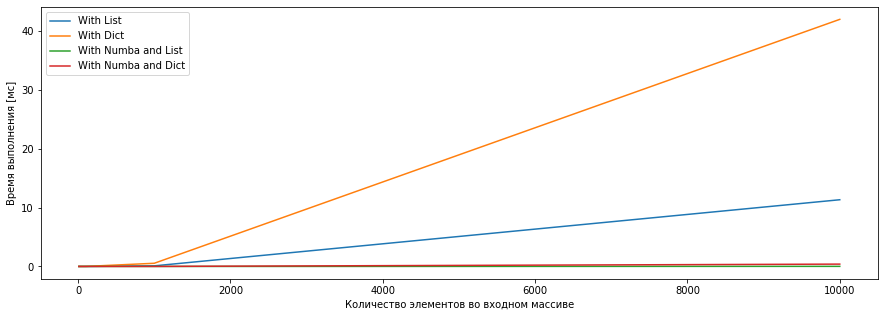

In [90]:
test = np.asarray(test)
x = [10**n for n in range(1,5)]
plt.figure(figsize=(15,5))
types = ['With List','With Dict','With Numba and List','With Numba and Dict']
for n, tp in enumerate(types): 
    plt.plot(x, test[:,n], label=tp)
plt.xlabel("Количество элементов во входном массиве")
plt.ylabel("Время выполнения [мс]")
plt.legend()
plt.show()

Алгоритмическая сложность функций с использованием списка - $O(N^3)$ поскольку для проверки на существование такой пары в списке результата необходимо пройтись по списку результата. Использование хэш-таблицы позволить сократить сложность проверки сущестования пары с $O(N)$ до $O(1)$, однако для того чтобы преобразовать ключи в список также необходимо пройтись по ключам, что не изменяет сложность, но увеличивает время выполнения функции. 